In [23]:
from collections import Counter
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from operator import itemgetter
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from textatistic import Textatistic
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud
import imageio
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import spacy
import seaborn as sns
import statsmodels.api as sm

In [24]:
df = pd.read_csv('car.csv')

In [25]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
#1.a
pd.get_dummies(df['Fuel_Type'])

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
292,0,1,0
293,0,0,1
294,0,0,1
295,0,1,0


In [27]:
df['CNG']=pd.get_dummies(df['Fuel_Type'])['CNG']
df['Diesel']=pd.get_dummies(df['Fuel_Type'])['Diesel']

In [28]:
pd.get_dummies(df['Seller_Type'])

,Dealer,Individual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
292,1,0
293,1,0
294,1,0
295,1,0


In [29]:
df['Dealer']=pd.get_dummies(df['Seller_Type'])['Dealer']

In [30]:
pd.get_dummies(df['Transmission'])

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
292,0,1
293,0,1
294,0,1
295,0,1


In [31]:
df['Automatic']=pd.get_dummies(df['Transmission'])['Automatic']

In [32]:
#2
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Dealer,Automatic
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,2013.700337,4.592862,7.368822,34117.619529,0.043771,0.006734,0.195286,0.649832,0.131313
std,2.832205,4.788848,7.130118,24557.427083,0.249533,0.081922,0.397090,0.477828,0.338313
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.260000,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.650000,6.400000,31604.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.850000,47000.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2018.000000,33.000000,36.230000,142000.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#everything looks good. There is no outliers. The sample size is less than 500. 

In [34]:
#3 
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Dealer,Automatic
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,1,0


In [35]:
#Year does not affect the Present_Price
#Increase in Kms_Driven will increase the Present_Price
#Owner does not affect the Present_Price
#Fue_Type does not affect the Present_Price because it has various types of Fuel_Type
#Seller_Type does not affect the Present_Price because it has various types of Seller_Type
#Transmission does not affect the Present_Price because it has various types of Transmission

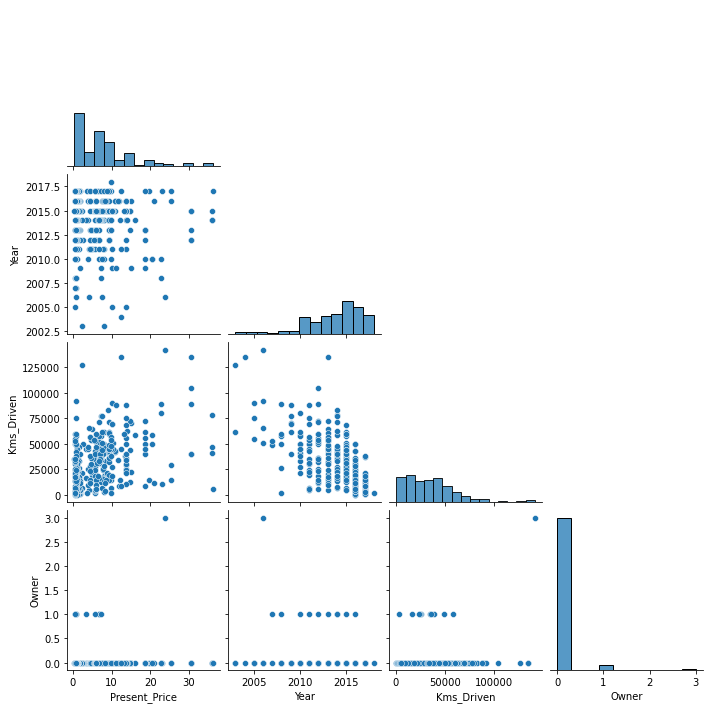

In [36]:
#4
sns.pairplot(df,x_vars=['Present_Price','Year','Kms_Driven','Owner'],y_vars=['Present_Price','Year','Kms_Driven','Owner'],corner=True)
plt.show()

In [38]:
#5
X=df[['Year','Kms_Driven','Owner','Diesel','Dealer','Automatic']]
X = sm.add_constant(X)
y=df['Present_Price']

In [39]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

      feature            VIF
0       const  986798.274847
1        Year       1.941704
2  Kms_Driven       2.180367
3       Owner       1.070104
4      Diesel       1.287547
5      Dealer       1.242565
6   Automatic       1.031430


In [40]:
#6
model = sm.OLS(y,X).fit()
y_pred = model.predict(X)
resid = y - y_pred
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Present_Price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     80.29
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           9.73e-59
Time:                        09:07:17   Log-Likelihood:                -858.98
No. Observations:                 297   AIC:                             1732.
Df Residuals:                     290   BIC:                             1758.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -519.4435    254.530     -2.041      0.0

In [41]:
X=df[['Year','Kms_Driven','Diesel','Dealer','Automatic']]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
y_pred = model.predict(X)
resid = y - y_pred
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Present_Price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     95.91
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.94e-59
Time:                        09:08:45   Log-Likelihood:                -859.73
No. Observations:                 297   AIC:                             1731.
Df Residuals:                     291   BIC:                             1754.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.2024    254.179     -1.964      0.0

In [42]:
#Year will increase the Present_Price. No match with original hypothesis
#Kms_Driven will increase the Present_Price.No match with original hypothesis
#Fuel_Type will increase the Present_Price.No match with original hypothesis
#Seller_Type will increase the Present_Price.No match with original hypothesis
#Tranmission will increase the Present_Price.No match with original hypothesis

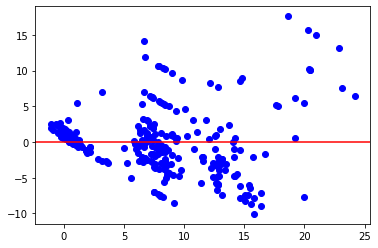

In [43]:
#8
plt.scatter(y_pred,resid,color='b')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

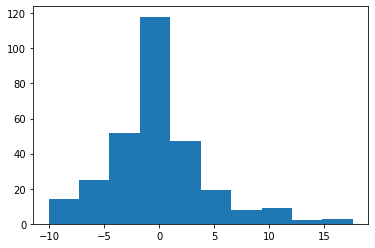

In [44]:
plt.hist(resid)
plt.show()

In [45]:
#9
#Linearity: Not Looks good from the pairplot and residual plot. Fail
#Normality: Histogram of residuals looks skewed. Fail!
#Constant Variance: Residual Plot does not looks good. Fail!
#No Multicollinearity: VIFs all under 5. Pass!
#No Autocorrelation: This may be violated because we are dealing with data of the same teams but over different time periods